<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/likeGaussianTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make data more Gaussian

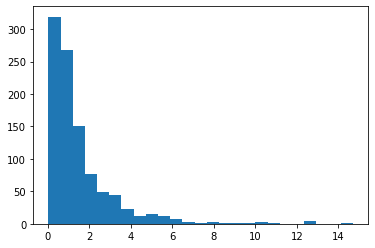

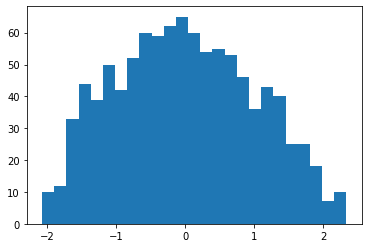

In [1]:
# demonstration of the power transform on data with a skew
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# gernerate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

In [8]:
from pandas import DataFrame

dataset = DataFrame(data)
print(dataset.describe())

                 0
count  1000.000000
mean      1.562735
std       1.774765
min       0.038481
25%       0.504873
50%       0.983852
75%       1.908183
max      14.698357


<bound method NDFrame.head of          0       1       2       3       4   ...      56      57      58      59  60
0    0.0200  0.0371  0.0428  0.0207  0.0954  ...  0.0180  0.0084  0.0090  0.0032   R
1    0.0453  0.0523  0.0843  0.0689  0.1183  ...  0.0140  0.0049  0.0052  0.0044   R
2    0.0262  0.0582  0.1099  0.1083  0.0974  ...  0.0316  0.0164  0.0095  0.0078   R
3    0.0100  0.0171  0.0623  0.0205  0.0205  ...  0.0050  0.0044  0.0040  0.0117   R
4    0.0762  0.0666  0.0481  0.0394  0.0590  ...  0.0072  0.0048  0.0107  0.0094   R
..      ...     ...     ...     ...     ...  ...     ...     ...     ...     ...  ..
203  0.0187  0.0346  0.0168  0.0177  0.0393  ...  0.0065  0.0115  0.0193  0.0157   M
204  0.0323  0.0101  0.0298  0.0564  0.0760  ...  0.0034  0.0032  0.0062  0.0067   M
205  0.0522  0.0437  0.0180  0.0292  0.0351  ...  0.0140  0.0138  0.0077  0.0031   M
206  0.0303  0.0353  0.0490  0.0608  0.0167  ...  0.0034  0.0079  0.0036  0.0048   M
207  0.0260  0.0363  0.0136  0.0272

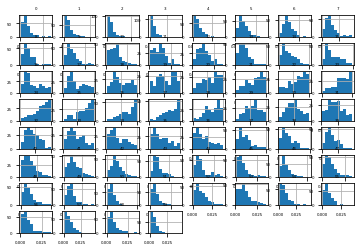

In [12]:
from pandas import read_csv


dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)

print(dataset.head)
print(dataset.describe())
# histograms of variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

Learning model with KNN

In [18]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
data = dataset.values
# seperate into input and output columns
X, y = data[:, :-1], data[:,-1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model,X,y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores),std(n_scores)))


Accuracy: 0.797 (0.073)


Shape of Sornal Data

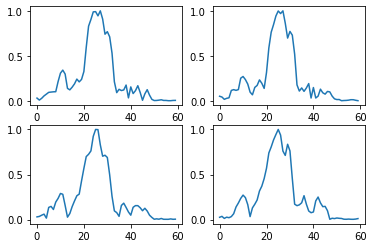

In [25]:
from  matplotlib import pyplot

pyplot.subplot(221)
pyplot.plot(X[204,:])
pyplot.subplot(222)
pyplot.plot(X[205,:])
pyplot.subplot(223)
pyplot.plot(X[206,:])
pyplot.subplot(224)
pyplot.plot(X[207,:])
pyplot.show()

# Box-Cox Transform

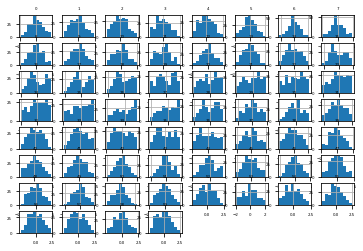

In [30]:
# visualize a box-cox transform of sonar dateset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# Load dataset

dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
data = dataset.values[:, :-1]
# make transformation
scaler = MinMaxScaler(feature_range=(1,2))
power = PowerTransformer(method='box-cox') 
pipeline=Pipeline(steps=[('s',scaler),('p', power)])
data = pipeline.fit_transform(data)
# revert to data framework
dataset = DataFrame(data)
# histogram of data
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show histogram
pyplot.show()

Evaluating model with KNN
- Fist: check the data shape not change
- Second: KNN training

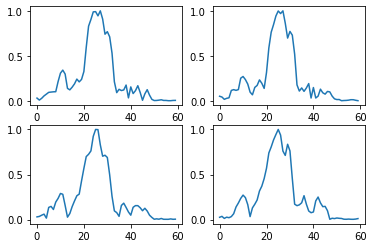

In [31]:
pyplot.subplot(221)
pyplot.plot(X[204,:])
pyplot.subplot(222)
pyplot.plot(X[205,:])
pyplot.subplot(223)
pyplot.plot(X[206,:])
pyplot.subplot(224)
pyplot.plot(X[207,:])
pyplot.show()

In [35]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
data = dataset.values
# split data into input and output
X, y = data[:,:-1], data[:,-1]

# ensure inputs are float and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = MinMaxScaler(feature_range=(1,2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline= Pipeline(steps=[('s', scaler), ('p', power),('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state= 1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.811 (0.085)


# Yeo-Johnson Transform
Does not required stricly positive input values

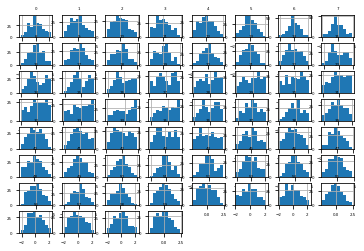

In [36]:
# visualize a yeo-johnson transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# Load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
data = dataset.values[:,:-1]
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histogram of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


In [43]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
data = dataset.values
# split data into input and output
X, y = data[:,:-1], data[:,-1]
# check data input are float and data out put are string
X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the model

power = PowerTransformer(method='yeo-johnson')
X = power.fit_transform(X)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats= 3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv= cv, n_jobs=-1)
# print the result
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



Accuracy: 0.803 (0.084)


# improve Yeo-Johnson transform with standardScaler first

In [45]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
data = dataset.values
# split data into input and output
X, y = data[:,:-1], data[:,-1]
# check data input are float and data out put are string
X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the model
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats= 3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv= cv, n_jobs=-1)
# print the result
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)
